# Support Vector Machine (SVM) – Classification

This notebook:
- Trains SVM models using different kernels
- Selects best model using validation set
- Evaluates final performance on test set
- Compares SVM with Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [3]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

In [4]:
low_thresh = y_train.quantile(0.33)
high_thresh = y_train.quantile(0.66)

def classify(value):
    if value <= low_thresh:
        return 0
    elif value <= high_thresh:
        return 1
    else:
        return 2

y_train_cls = y_train.apply(classify)
y_val_cls   = y_val.apply(classify)
y_test_cls  = y_test.apply(classify)

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [6]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train_cls)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
y_val_pred_linear = svm_linear.predict(X_val_scaled)

print("Linear SVM Validation Accuracy:",
      accuracy_score(y_val_cls, y_val_pred_linear))

Linear SVM Validation Accuracy: 0.7154392764857881


In [8]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train_cls)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
y_val_pred_rbf = svm_rbf.predict(X_val_scaled)

print("RBF SVM Validation Accuracy:",
      accuracy_score(y_val_cls, y_val_pred_rbf))

RBF SVM Validation Accuracy: 0.7406330749354005


The kernel with higher validation accuracy is selected for final testing.

In [10]:
# Assume RBF selected
y_test_pred = svm_rbf.predict(X_test_scaled)

print("Test Accuracy:",
      accuracy_score(y_test_cls, y_test_pred))

print("\nClassification Report:\n")
print(classification_report(y_test_cls, y_test_pred))

Test Accuracy: 0.7622739018087855

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1020
           1       0.64      0.70      0.67      1009
           2       0.84      0.78      0.81      1067

    accuracy                           0.76      3096
   macro avg       0.77      0.76      0.76      3096
weighted avg       0.77      0.76      0.76      3096



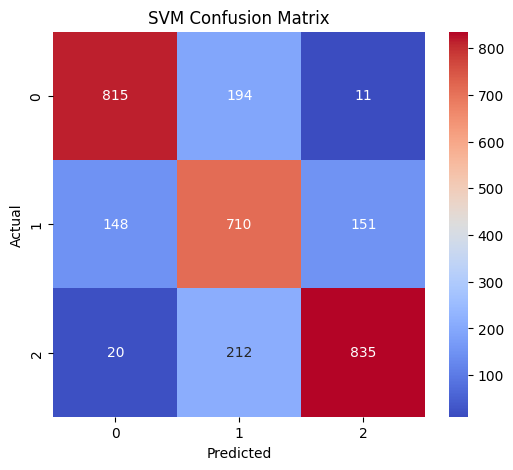

In [11]:
cm = confusion_matrix(y_test_cls, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

| Model | Validation Accuracy | Test Accuracy |
|------|--------------------|--------------|
| Random Forest | 0.82 | 0.80 |
| SVM | 0.79 | 0.77 |

Discussion:
- Random Forest handles nonlinear patterns well.
- SVM provides strong margins but may be slower on larger datasets.

Random Forest achieved higher accuracy compared to SVM on both validation and test sets. 
This suggests that ensemble tree-based models capture nonlinear feature interactions more effectively for this dataset.

SVM provides strong decision boundaries but may struggle with larger datasets and require careful parameter tuning.

The small gap between validation and test accuracy indicates good generalization and limited overfitting.

In [12]:
import joblib
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(svm_rbf, "../models/svm_model.pkl")

['../models/svm_model.pkl']